In [1]:
import numpy as np
import pandas as pd

In [2]:
# DatetiemIndex
dates = pd.date_range ('2020-01-01', periods=48, freq ='M')
                 
# additive model: trend + cycle + seasonality + irregular factor
timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = np.sin(np.linspace (0, 3.14*2,48))
seasonal_factor = np.sin(np.linspace (0, 3.14*8, 48))
np.random.seed(2004)
irregular_factor = np.random.randn(len(dates))

In [3]:
df = pd.DataFrame ({'timeseries': trend_factor + cycle_factor + seasonal_factor + irregular_factor,
                    'trend': trend_factor,
                    'cycle': cycle_factor,
                    'seasonal': seasonal_factor,
                    'irregular': irregular_factor},
                    index=dates)

In [5]:
df.head()

,timeseries,trend,cycle,seasonal,irregular
2020-01-31,1.298060,0.0,0.000000,0.000000,1.298060
2020-02-29,2.116742,1.1,0.133220,0.509383,0.374139
2020-03-31,1.908068,2.2,0.264065,0.876689,-1.432686
2020-04-30,1.718491,3.3,0.390202,0.999468,-2.971179
2020-05-31,6.498606,4.4,0.509383,0.843475,0.745747


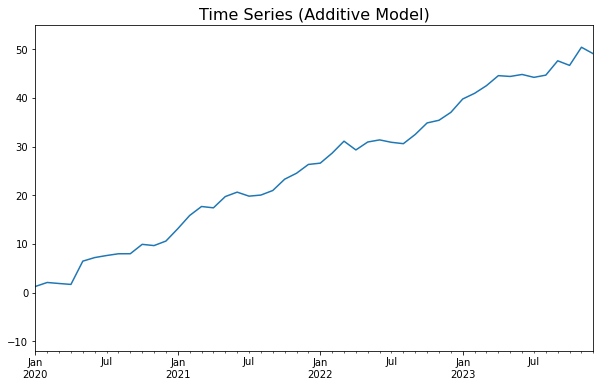

In [7]:
# Time variation
import matplotlib.pyplot as plt

plt.figure(figsize =[10,6])
df.timeseries.plot()
plt.title('Time Series (Additive Model)', fontsize =16)
plt.ylim(-12, 55)
plt.show()

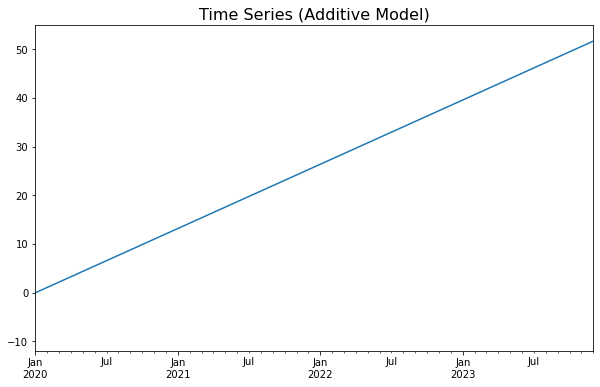

In [8]:
# Time variation
import matplotlib.pyplot as plt

plt.figure(figsize =[10,6])
df.trend.plot()
plt.title('Time Series (Additive Model)', fontsize =16)
plt.ylim(-12, 55)
plt.show()

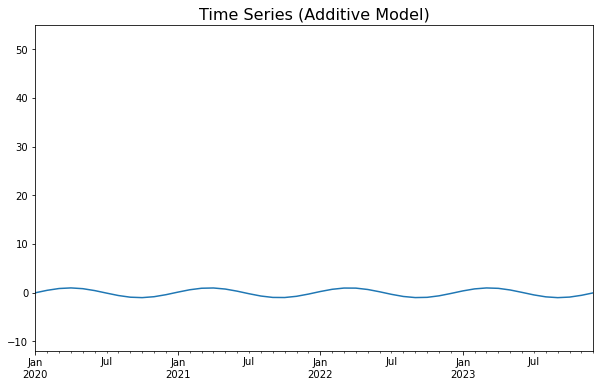

In [9]:
# Time variation
import matplotlib.pyplot as plt

plt.figure(figsize =[10,6])
df.seasonal.plot()
plt.title('Time Series (Additive Model)', fontsize =16)
plt.ylim(-12, 55)
plt.show()

# rolling 평활화기법
* pandas.DataFrame.rolling
* rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')[source]

In [10]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})

In [11]:
df.rolling(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,NaN
4,NaN


In [12]:
import FinanceDataReader as fdr

In [13]:
# Apple(AAPL), 2017-01-01 ~ Now
df = fdr.DataReader('AAPL', '2017')
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,29.04,28.95,29.08,28.69,115130000.0,0.0031
2017-01-04,29.00,28.96,29.13,28.94,84470000.0,-0.0014
2017-01-05,29.15,28.98,29.22,28.95,88770000.0,0.0052
2017-01-06,29.48,29.20,29.54,29.12,127010000.0,0.0113
2017-01-09,29.75,29.49,29.86,29.48,134250000.0,0.0092


In [14]:
df = pd.DataFrame({
    "week":pd.date_range(start="2020 08", periods=8, freq ="W"),
    "sales":[39,44,40,45,38,43,39,np.nan],
    "3MA":[0]*8
})
# 0~2주차 평균을 3 주차에 shift 해서 적용
df["3MA"] = df [["sales"]].rolling(3).mean().shift(1)
df

,week,sales,3MA
0,2020-08-02,39.0,NaN
1,2020-08-09,44.0,NaN
2,2020-08-16,40.0,NaN
3,2020-08-23,45.0,41.0
4,2020-08-30,38.0,43.0
5,2020-09-06,43.0,41.0
6,2020-09-13,39.0,42.0
7,2020-09-20,NaN,40.0


In [16]:
# Apple(AAPL), 2017-01-01 ~ Now
df = fdr.DataReader('AAPL', '2017')
# df.head()
df['Close_7Days_Mean'] = df['Close'].rolling(7).mean()

df.tail()

,Close,Open,High,Low,Volume,Change,Close_7Days_Mean
Date,,,,,,,
2022-07-15,150.17,149.78,150.86,148.20,76260000.0,0.0115,146.892857
2022-07-18,147.07,150.84,151.54,146.74,77540000.0,-0.0206,146.995714
2022-07-19,151.00,147.98,151.20,146.92,82150000.0,0.0267,147.561429
2022-07-20,153.04,151.17,153.69,150.39,64460000.0,0.0135,148.728571
2022-07-21,155.35,154.70,155.57,151.96,64310000.0,0.0151,150.084286


<AxesSubplot:xlabel='Date'>

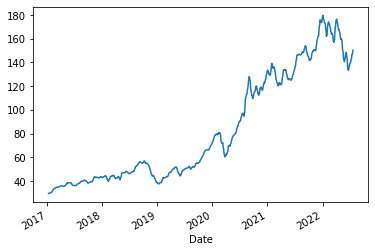

In [17]:
df['Close_7Days_Mean'].plot()